In [2]:
import numpy as np
import matplotlib.pyplot as plt

### パーセプトロンとは
複数の信号を受け取り、1つの信号を出力する。

In [3]:
# ANDゲート
def AND(x1: int, x2: int):
    w1, w2 = 0.5, 0.5
    bias = -0.7
    x = np.array([x1, x2])
    w = np.array([w1, w2])
    tmp = np.dot(x, w) + bias
    if tmp <=0:
        return 0
    else:
        return 1

print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


In [4]:
# ORゲート
def OR(x1: int, x2: int):
    w1, w2 = 0.5, 0.5
    bias = -0.4
    x = np.array([x1, x2])
    w = np.array([w1, w2])
    tmp = np.dot(x, w) + bias
    if tmp <=0:
        return 0
    else:
        return 1

print(OR(0,0))
print(OR(1,0))
print(OR(0,1))
print(OR(1,1))

0
1
1
1


In [5]:
# NANDゲート
def NAND(x1: int, x2: int):
    w1, w2 = 0.5, 0.5
    bias = -0.7
    x = np.array([x1, x2])
    w = np.array([w1, w2])
    tmp = np.dot(x, w) + bias
    if tmp > 0:
        return 0
    else:
        return 1

print(NAND(0,0))
print(NAND(1,0))
print(NAND(0,1))
print(NAND(1,1))

1
1
1
0


In [6]:
# ANDとORを組み合わせてXORゲートを構築する。
def XOR(x1: int, x2: int):
    x3, x4 = NAND(x1, x2), OR(x1, x2)
    tmp = AND(x3, x4)
    if tmp <= 0:
        return 0
    else:
        return 1

print(XOR(0,0))
print(XOR(1,0))
print(XOR(0,1))
print(XOR(1,1))

0
1
1
0


### 万能近似定理
ノードを増やしていくと、ニューラルネットワークの表現力はどんどん上がっていく。
訓練誤差がだんだん小さくなる。≠　汎化性能が高くなる。

### 活性化関数


### step関数
$h(x) = 1 (x>=0)$  
$h(x) = 0 (x<0)$

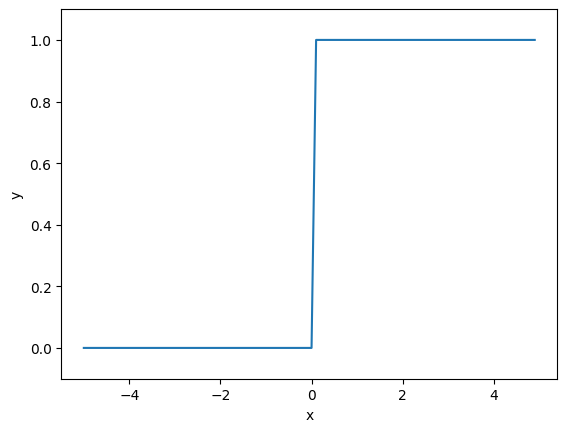

In [7]:

def step(x: np.ndarray):
    return (x > 0).astype(int)

x = np.arange(-5,5,0.1)
y = step(x) 
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-0.1,1.1])
plt.show()

### Sigmoid
$\displaystyle{h(x)=\frac{1}{(1+\exp(-x))}}$

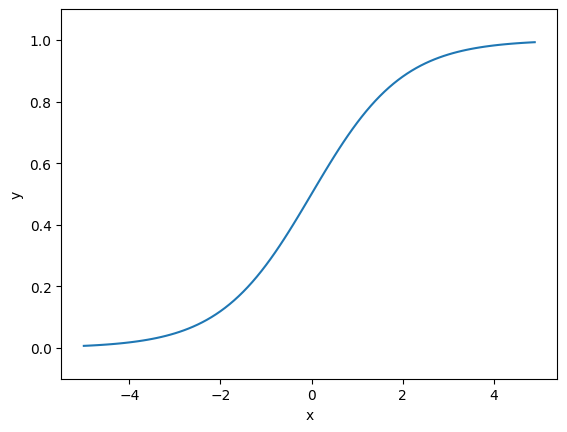

In [8]:
# Sigmoid
def sigmoid(x: np.ndarray):
    return 1 / (1 + np.exp(-x))
x = np.arange(-5,5,0.1)
y = sigmoid(x) 
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-0.1,1.1])
plt.show()

### tanh関数
$\displaystyle h(x) = \tanh(x) = \frac{\sinh(x)}{\cosh(x)}=\frac{e^x-e^{-x}}{e^x+e^{-x}}$  

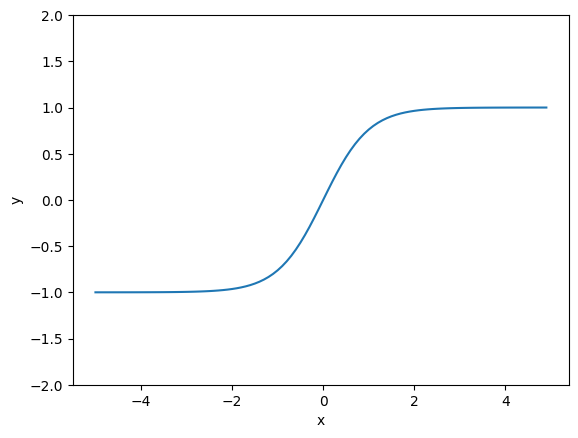

In [9]:
def tanh(x: np.ndarray):
    return np.sinh(x)/np.cosh(x)

x = np.arange(-5,5,0.1)
y = tanh(x) 
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-2,2])
plt.show()

### ReLU関数
$h(x) = x (x>=0)$  
$h(x) = 0 (x<0)$

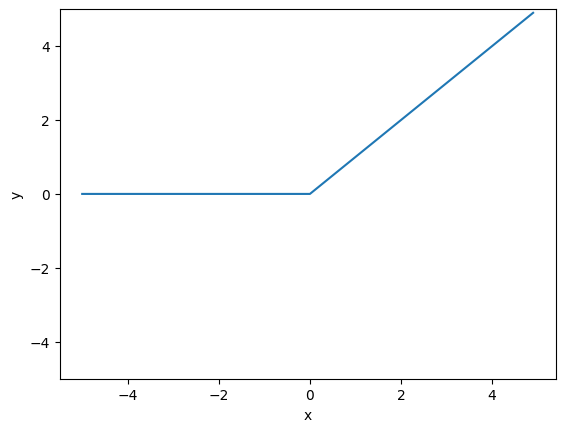

In [10]:
def relu(x: np.ndarray):
    return np.maximum(0, x) # maximum: 配列の各要素を0と比較して大きい方を配列で返す

x = np.arange(-5,5,0.1)
y = relu(x) 
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-5.0,5])
plt.show()

### LeakyReLU
$h(x) = x (x>=0)$  
$h(x) = ax (x<0)$

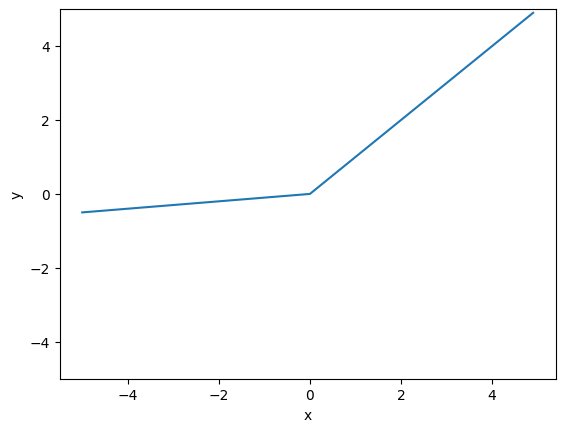

In [11]:
alpha = 0.1
def leaky_relu(x: np.ndarray):
    return np.array([elm if elm >= 0 else alpha * elm for elm in x])
# 別解
def leaky_relu(x: np.ndarray):
    return np.maximum(0, x) + np.minimum(0, x) * alpha
x = np.arange(-5,5,0.1)
y = leaky_relu(x) 
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-5.0,5])
plt.show()

### Softplus
$h(x)=\log(1+\exp(x))$

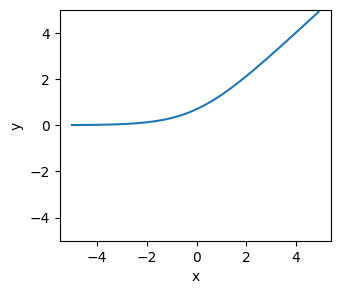

In [12]:
def softplus(x:np.ndarray):
    return np.log(1+np.exp(x))


x = np.arange(-5,5,0.1)
y = softplus(x) 
plt.figure(figsize=(3.5,3))
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-5.0,5])
plt.show()

### Hardtanh
$h(x) = x (-1<=x, x<=1)$  
$h(x) = 1 (x>1)$  
$h(x) = -1 (x<-1)$

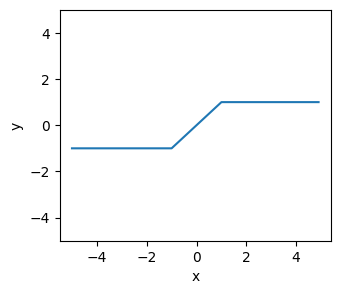

In [13]:
def hardtanh(x: np.ndarray):
    def lambda_x(elm):
        if elm > 1:
            return 1
        elif elm < -1:
            return -1
        else:
            return elm
    return np.array([lambda_x(elm) for elm in x])
# 別解
def hardtanh(x: np.ndarray):
    return np.maximum(-1, np.minimum(1, x))

x = np.arange(-5,5,0.1)
y = hardtanh(x) 
plt.figure(figsize=(3.5,3))
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-5.0,5])
plt.show()

### Softmax関数
多クラス分類問題で用いる。
値の各要素を予め足しても引いてもSoftmaxの出力は同じになる  
合計が1になるように正規化する。 
$\displaystyle{y_k=\frac{\exp(a_k)}{\Sigma_{i=1}^{K}(\exp(a_i))}}$  
   
##### なぜ、指数変換してから正規化するのか？
負の値も全て0より大きい値で表現できるから

In [16]:
print(np.exp(40))
print(np.exp(100))
print(np.exp(1000))

2.3538526683702e+17
2.6881171418161356e+43
inf


/tmp/ipykernel_67699/3160519054.py:3: RuntimeWarning: overflow encountered in exp
  print(np.exp(1000))


In [28]:
def softmax(x: np.ndarray):
    max_x = np.max(x)
    # 出力のオーバーフロー対策として最大値で引く
    exp_x = np.exp(x - max_x)
    sum_x = np.sum(x)
    return x / sum_x
# 別解
def softmax(x: np.ndarray):
    x = x - np.max(x, axis=1, keepdims=True) # オーバーフロー対策
    y = np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
    return y
# ソフトマックス関数を使用した場合
y = softmax(np.array([1.0, 2.0, 3.0]))
print(y)
# 合計が1になることの確認
print("合計=", np.sum(y))

[0.16666667 0.33333333 0.5       ]
合計= 1.0


In [23]:
# Sigmoidに通してから、正規化した場合
y = sigmoid(np.array([1.0, 2.0, 3.0]))
print(y / np.sum(y))


[0.28507647 0.34346703 0.37145651]


Sigmoidを用いると、0から離れた大きな値同士、0から離れた小さな値同士は、出力される値の差が小さい。  
例:  
x= [ **50**   0 **100**]  
ソフトマックス= [0. 0. 1.]  
単純な正規化= [**0.333** 0.    **0.667**]  
シグモイド関数を通した後に正規化= [**0.4** 0.2 **0.4**]


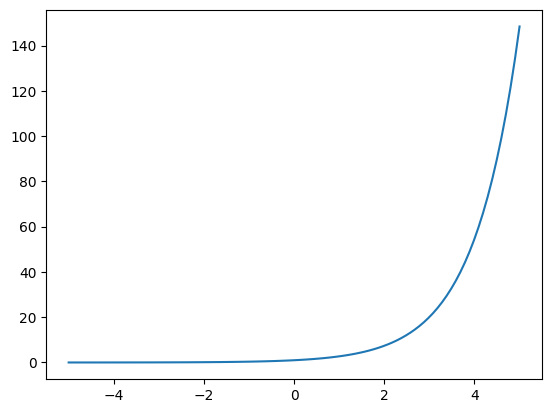

In [15]:
# exp関数
x = np.linspace(-5,5,100)
y = np.exp(x)
plt.plot(x,y)
plt.show()

In [27]:
def softmax_s(x: np.ndarray):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T
    else:
        x = x - np.max(x)
        return np.exp(x) / np.sum(np.exp(x))
x = np.array([[1.0, 2.0, 3.0],
              [4.0, 3.0, 2.0]])

y = softmax_s(x)
print("y=")
print(y)
print("yの合計=")
print(y.sum(axis=1))
print("")

y=
[[0.09003057 0.24472847 0.66524096]
 [0.66524096 0.24472847 0.09003057]]
yの合計=
[1. 1.]



#### クロスエントロピー誤差関数

$\displaystyle L =-\sum_{k}^K{t_k \log y_k}$  

y_k: 予測(確率分布)  
t_k: 正解(ワンホットベクトル)

In [29]:
def cross_entropy_error(y: np.ndarray, t: np.ndarray):
    delta = 1e-7 # logは0をとれないため
    return -np.sum(t*np.log(y+delta))

# TODO:次回やるべきこと
- axisになれる。
- バッチ版を作成してテストする。
- なぜミニバッチにおいてバッチサイズが大きいほど勾配推定が正確になるのか。
- なぜ小さなバッチサイズは、正則化の効果をもたらすことがあるのか。-> 小さな単位で最適化していくので過学習しにくい
